In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
import os
os.chdir('C:\\Users\\Houtan\\OneDrive\\Documents\\GitHub\\my_grad')
print(os.getcwd())

C:\Users\Houtan\OneDrive\Documents\GitHub\my_grad


In [4]:
import sys
sys.path.append('C:\\Users\\Houtan\\OneDrive\\Documents\\GitHub\\my_grad')

In [5]:
from my_grad.value import Value
from my_grad.neural_network import Library, Neuron, Layer, MLP

In [6]:
# # random seed if want
# np.random.seed(42)
# random.seed(42)

In [7]:
# getting our dataset from scikit learn
# we want binary classification
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.1) # make_moons generates two interleaving half circles
                                            # commonly used in test clustering and classification algorithms due to its non-linear decision boundary

# want to make it so y is between -1 and 1, it is intially 0 to 1

y = y*2 - 1

X


array([[ 1.80232038, -0.1684903 ],
       [ 0.66963904, -0.44959512],
       [-0.83093644,  0.66808552],
       [-0.93752592,  0.71401514],
       [ 2.02574352,  0.19748998],
       [ 0.60188907,  0.67082455],
       [ 0.23085448,  0.13082649],
       [ 0.89137496,  0.32002717],
       [-0.35230567,  0.92460303],
       [ 1.30876246, -0.53767516],
       [ 0.77270039,  0.56120816],
       [ 0.18485907,  0.03168547],
       [-0.20530688,  1.06975343],
       [ 0.10681342,  0.48876801],
       [-1.05615016,  0.18126747],
       [-0.57073459,  0.91406506],
       [ 0.50876465,  0.80686942],
       [ 0.05331891, -0.20939275],
       [ 0.01092386,  0.59722902],
       [ 0.11638828,  1.02973897],
       [ 1.34414523, -0.68004934],
       [ 1.58714775, -0.38761411],
       [-0.75356844,  0.33825936],
       [-0.12889731,  0.83208919],
       [ 1.45614825, -0.39407259],
       [ 0.92219597,  0.07851884],
       [-0.13685111,  0.79592312],
       [ 0.90365752, -0.46471421],
       [-0.98143288,

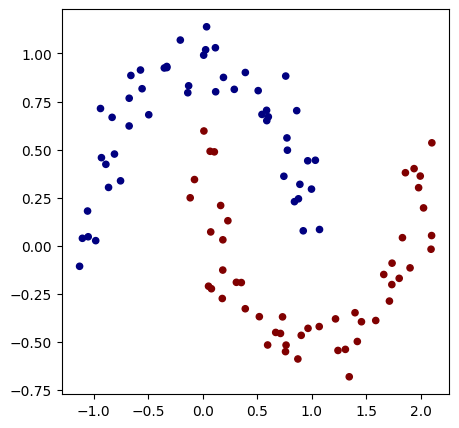

In [8]:
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

### TANH MODEL

In [9]:
# initialise our model

model = MLP(2, [16, 16, 1], non_lin='tanh')
print(model)
print(f"number of parameters: {len(model.parameters())}")

MLP: [Layer of [TanhNeuron(2), TanhNeuron(2), TanhNeuron(2), TanhNeuron(2), TanhNeuron(2), TanhNeuron(2), TanhNeuron(2), TanhNeuron(2), TanhNeuron(2), TanhNeuron(2), TanhNeuron(2), TanhNeuron(2), TanhNeuron(2), TanhNeuron(2), TanhNeuron(2), TanhNeuron(2)], Layer of [TanhNeuron(16), TanhNeuron(16), TanhNeuron(16), TanhNeuron(16), TanhNeuron(16), TanhNeuron(16), TanhNeuron(16), TanhNeuron(16), TanhNeuron(16), TanhNeuron(16), TanhNeuron(16), TanhNeuron(16), TanhNeuron(16), TanhNeuron(16), TanhNeuron(16), TanhNeuron(16)], Layer of [TanhNeuron(16)]]
number of parameters: 337


In [10]:
# inputs = [list(map(Value, x_row)) for x_row in X]
# for input in inputs:
#     print([val.data for val in input])

In [11]:
# function for the loss function, considering putting in the class but haven't seen any other machine
# learning frameworks do this

def loss(batch_size=None): # could implement batch size method for datasets that are extremely large
    X_b, y_b = X, y

    # need to convert our dataset into our Value objects
    inputs = list(map(Value, x_row) for x_row in X_b)

    # then apply the model to each of these 
    scores = list(map(model, inputs))

    # calculating the Max-Margin Loss
    losses = [(1 + -y_i*score_i) for y_i, score_i in zip(y_b, scores)]

    #averaging the individual losses to get the mean loss
    data_loss = sum(losses) * ( 1.0 / len(losses))

    #L2 regularisation where it returns the sum squared of all parameters in the model
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))

    total_loss = data_loss + reg_loss

    accuracy = [(y_i > 0) == (score_i.data > 0) for y_i, score_i in zip(y_b, scores)]

    return total_loss, sum(accuracy) / len(accuracy)

In [12]:
total_loss, acc = loss()
print(total_loss, acc)

Value(data=1.0121457593438765, grad=0) 0.5


In [13]:
# optimisation

for epoch in range(100):

    # forward pass
    total_loss, acc = loss()

    # backward pass
    model.zero_grad()
    total_loss.backward()

    # 
    # learning rate to decrease as you get closer to the end of the steps
    learning_rate = 1.0 -0.9*epoch/100

    for p in model.parameters():
        p.data -= learning_rate * p.grad
    
    if epoch % 10 == 0:
        print(f"Step: {epoch} | Loss: {total_loss.data} | Accuracy: {acc*100}%")


Step: 0 | Loss: 1.0121457593438765 | Accuracy: 50.0%
Step: 10 | Loss: 0.4069165764429503 | Accuracy: 85.0%
Step: 20 | Loss: 0.281618476297341 | Accuracy: 86.0%
Step: 30 | Loss: 0.2546891767847629 | Accuracy: 88.0%
Step: 40 | Loss: 0.24768382085622295 | Accuracy: 88.0%
Step: 50 | Loss: 0.24640238842255646 | Accuracy: 89.0%
Step: 60 | Loss: 0.24597782694552467 | Accuracy: 89.0%
Step: 70 | Loss: 0.24567944096305444 | Accuracy: 89.0%
Step: 80 | Loss: 0.24547125748964987 | Accuracy: 89.0%
Step: 90 | Loss: 0.24533241313702497 | Accuracy: 89.0%


(-1.6800493407362174, 2.0699506592637826)

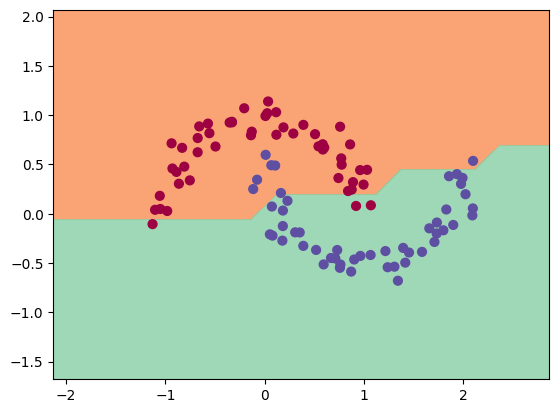

In [15]:
# visualisation of the decision boundary for our binary classification using a mesh grid

# step size of the grid
h = 0.25

# determining the min and max values of the first feature in X and extending by 1 unit each side, same for the y values
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max  = X[:, 1].min() - 1, X[:, 1].max() + 1

# creation of mesh grid

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

X_mesh = np.c_[xx.ravel(), yy.ravel()] # .ravel() flattens the grid arrays and np.c_ combines flattened arrays
inputs = [list(map(Value, x_row)) for x_row in X_mesh] # each point in X_mesh is converted into a list of Value objects

scores = list(map(model, inputs))

Z = np.array([s.data > 0 for s in scores]) # boolean array indicating whether each score is greater than 0
Z = Z.reshape(xx.shape) # reshaped to match the size of the grip

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())





#### ReLU seems to be significantly better, as shown on Andrej Karpathy's model